In [1]:

import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

In [2]:
month='07'
year = '2019'

clim = '/data/cmems/my.cmems-du.eu/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083-climatology_P1M-m/mercatorglorys12v1_gl12_mean_1993_2016_{}.nc'.format(month)
glorys = '/data/cmems/my.cmems-du.eu/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083_P1M-m/{}/mercatorglorys12v1_gl12_mean_{}{}.nc'.format(year,year,month)

In [3]:
dclim = xr.open_dataset(clim)
dglorys = xr.open_dataset(glorys)

In [4]:
# Flemish cap coords
lat_min=47
lat_max=47
lon_min=-52.83
lon_max=-42

In [5]:
dclim=dclim.sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min,lon_max)).squeeze()
depth_clim = dclim.depth.values
longitude_clim = dclim.longitude.values

In [6]:
dglorys=dglorys.sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min,lon_max)).squeeze()
depth_glorys = dglorys.depth.values
longitude_glorys = dglorys.longitude.values

In [7]:
# Import caclMetrics package
import sys
sys.path.insert(0, "/home/handres/scripts/packages/modelData")
import calc_metrics

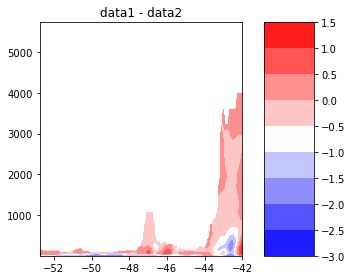

goodvals  3619
mindiff  -2.7444696
maxdiff  1.1565294
meandiff  -0.78938586
rmse 66.31149


In [8]:
num, minv, maxv, meanv, rmse, rmse_per_cell = calc_metrics.calc_metrics2D(dglorys.thetao.values, dclim.thetao.values, 
                                                                          longitude_glorys, depth_glorys,
                                                                          longitude_clim, depth_clim,)